# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | sant antoni de portmany
Processing Record 4 of Set 1 | nishinoomote
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | portage
Processing Record 7 of Set 1 | axim
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | prince rupert
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | coahuayana de hidalgo
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | paramonga
Processing Record 20 of Set 1 | jayapura
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...

In [54]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

[{'City': 'waitangi', 'Lat': -43.9535, 'Lng': -176.5597, 'Max Temp': 283.61, 'Humidity': 98, 'Cloudiness': 100, 'Wind Speed': 4.92, 'Country': 'NZ', 'Date': 1721626829}, {'City': 'invercargill', 'Lat': -46.4, 'Lng': 168.35, 'Max Temp': 280.38, 'Humidity': 82, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'NZ', 'Date': 1721626830}, {'City': 'sant antoni de portmany', 'Lat': 38.9807, 'Lng': 1.3036, 'Max Temp': 295.14, 'Humidity': 79, 'Cloudiness': 20, 'Wind Speed': 2.06, 'Country': 'ES', 'Date': 1721626831}, {'City': 'nishinoomote', 'Lat': 30.7333, 'Lng': 131, 'Max Temp': 305.46, 'Humidity': 66, 'Cloudiness': 40, 'Wind Speed': 4.63, 'Country': 'JP', 'Date': 1721626832}, {'City': 'jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 290.38, 'Humidity': 91, 'Cloudiness': 99, 'Wind Speed': 0.82, 'Country': 'US', 'Date': 1721626686}, {'City': 'portage', 'Lat': 41.1667, 'Lng': -81.1998, 'Max Temp': 292.69, 'Humidity': 80, 'Cloudiness': 0, 'Wind Speed': 1.54, 'Country': 'US', 'Date': 17

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.61,98,100,4.92,NZ,1721626829
1,invercargill,-46.4000,168.3500,280.38,82,100,0.89,NZ,1721626830
2,sant antoni de portmany,38.9807,1.3036,295.14,79,20,2.06,ES,1721626831
3,nishinoomote,30.7333,131.0000,305.46,66,40,4.63,JP,1721626832
4,jamestown,42.0970,-79.2353,290.38,91,99,0.82,US,1721626686


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.61,98,100,4.92,NZ,1721626829
1,invercargill,-46.4000,168.3500,280.38,82,100,0.89,NZ,1721626830
2,sant antoni de portmany,38.9807,1.3036,295.14,79,20,2.06,ES,1721626831
3,nishinoomote,30.7333,131.0000,305.46,66,40,4.63,JP,1721626832
4,jamestown,42.0970,-79.2353,290.38,91,99,0.82,US,1721626686


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

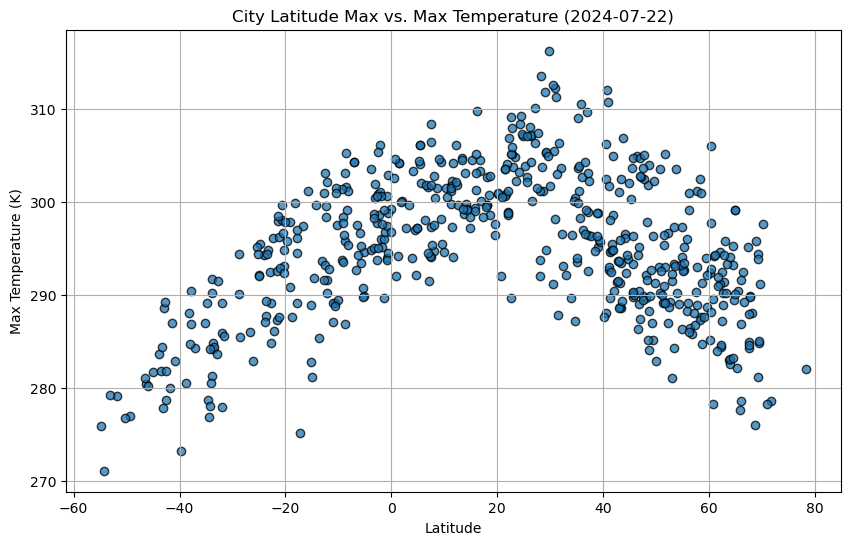

In [58]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], edgecolors="k", alpha=0.75, linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Max vs. Max Temperature (2024-07-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

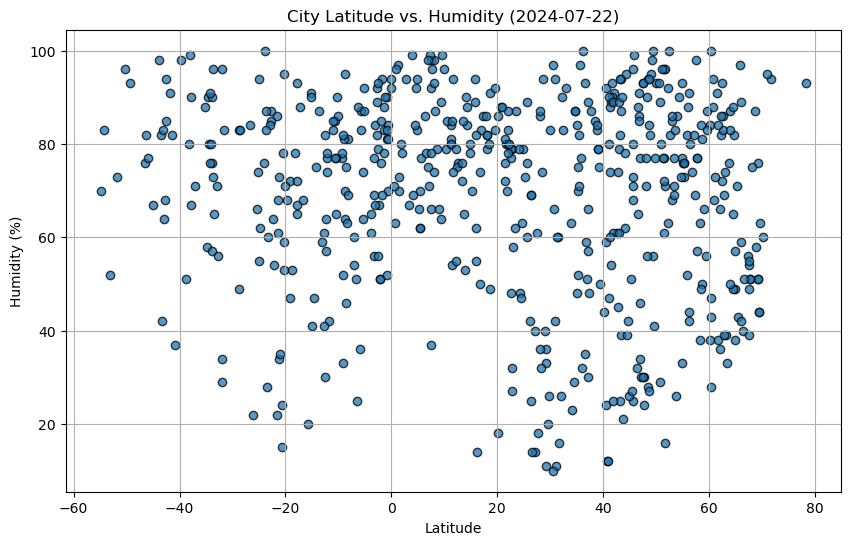

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="k", alpha=0.75, linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-07-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

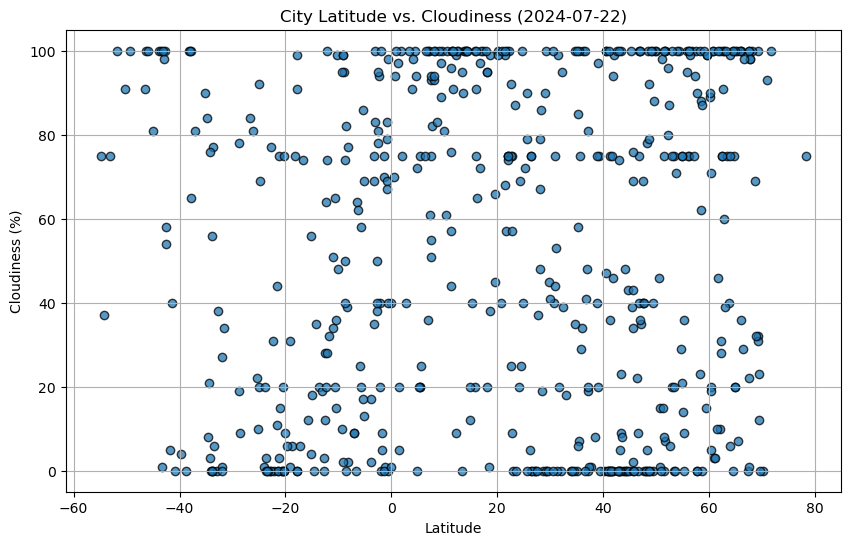

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='k', alpha=0.75, linewidths=1, marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-07-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

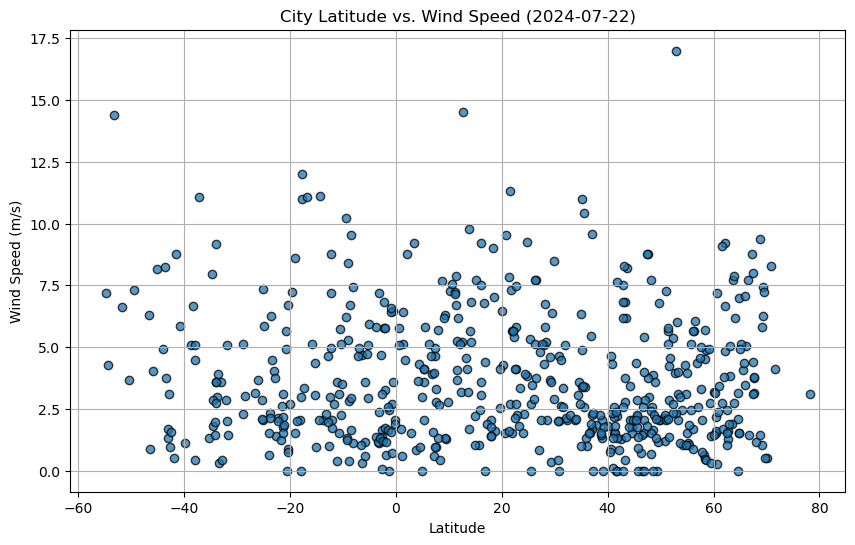

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="k", alpha=0.75, linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-07-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Define a function to create Linear Regression plots
from scipy import stats

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, xlim=None, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, edgecolors='k', alpha=0.75, linewidths=1, marker='o')

    plt.plot(x_values, regress_values, 'r-')

    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (x_values.min() + 1, y_values.max() - 1), fontsize=15, color="red")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sant antoni de portmany,38.9807,1.3036,295.14,79,20,2.06,ES,1721626831
3,nishinoomote,30.7333,131.0000,305.46,66,40,4.63,JP,1721626832
4,jamestown,42.0970,-79.2353,290.38,91,99,0.82,US,1721626686
5,portage,41.1667,-81.1998,292.69,80,0,1.54,US,1721626835
6,axim,4.8699,-2.2405,297.18,83,72,2.99,GH,1721626836


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.61,98,100,4.92,NZ,1721626829
1,invercargill,-46.4000,168.3500,280.38,82,100,0.89,NZ,1721626830
7,papatowai,-46.5619,169.4708,281.12,76,91,6.30,NZ,1721626837
9,edinburgh of the seven seas,-37.0676,-12.3116,284.26,71,81,11.06,SH,1721626839
10,dunedin,-45.8742,170.5036,280.26,77,100,4.02,NZ,1721626841


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3490018236907085


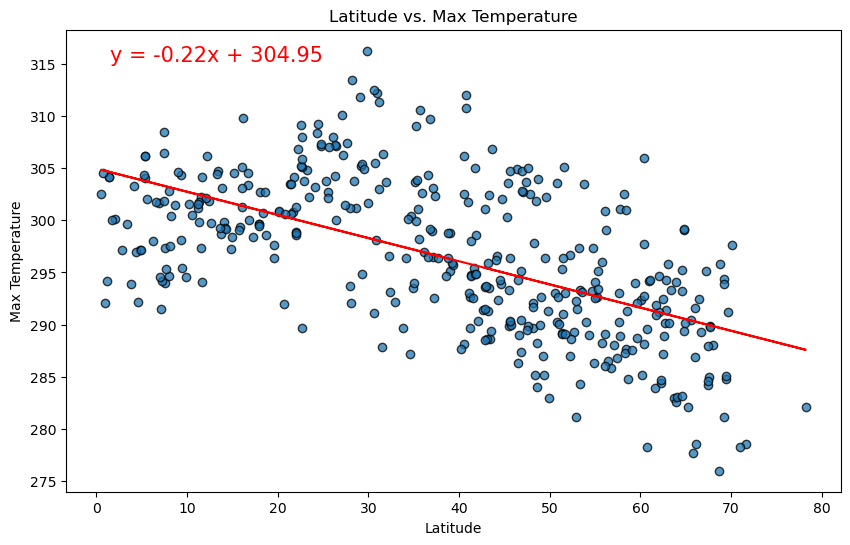

In [94]:
# Linear regression on Northern Hemisphere
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_temp = northern_hemi_df["Max Temp"]

plot_linear_regression(northern_hemi_lat, northern_hemi_temp,
                       "Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature")

The r-value is: 0.5881199896441404


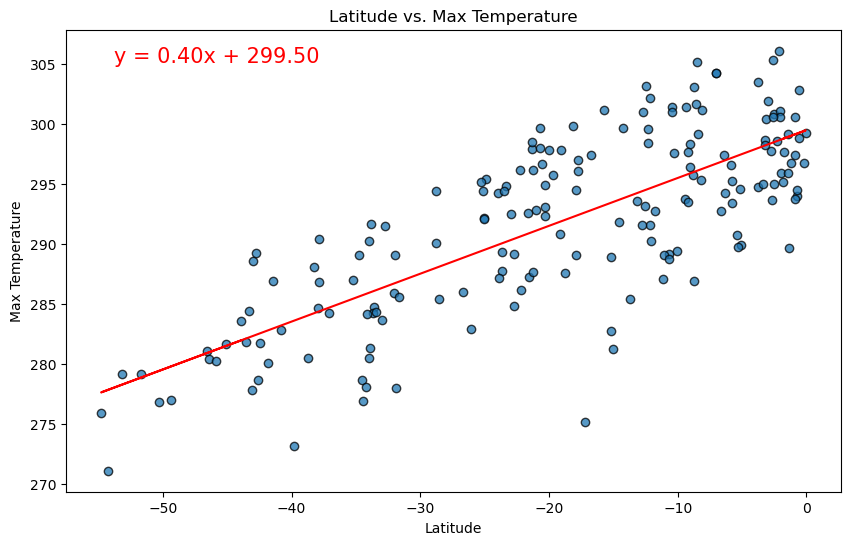

In [95]:
# Linear regression on Southern Hemisphere
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_temp = southern_hemi_df["Max Temp"]

plot_linear_regression(southern_hemi_lat, southern_hemi_temp,
                       "Latitude vs. Max Temperature",
                       "Latitude", "Max Temperature")

**Discussion about the linear relationship:** Looking at the plot for the Northern Hemisphere, it shows that as the latitute increases, the temperature decreases. This makes sense as a higher latitude would indicate that you are moving closer to the northern pole. For the Southern Hemisphere plot, it shows a similar trend that the higher the latitude the higher the temperature. This is because in this case you are moving more towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.017389899447309568


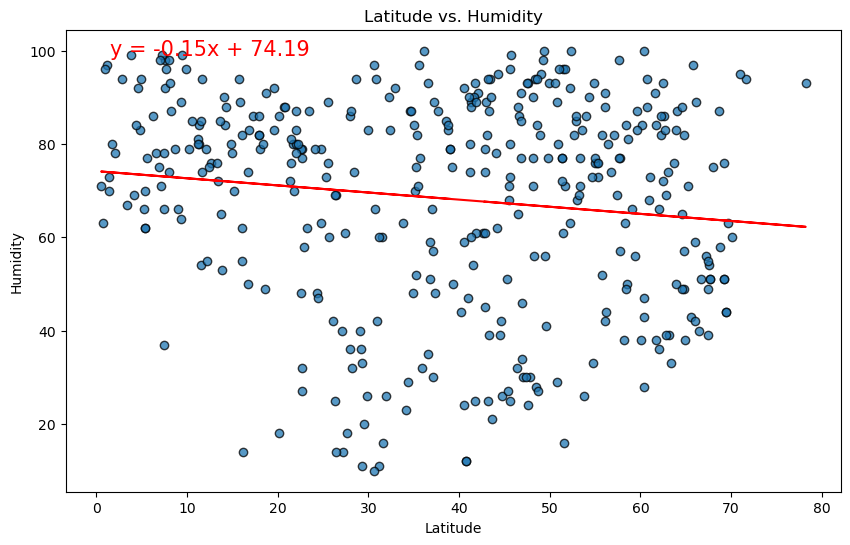

In [97]:
# Northern Hemisphere
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_humidity = northern_hemi_df["Humidity"]

plot_linear_regression(northern_hemi_lat, northern_hemi_humidity,
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity")

The r-value is: 0.0015270980362689032


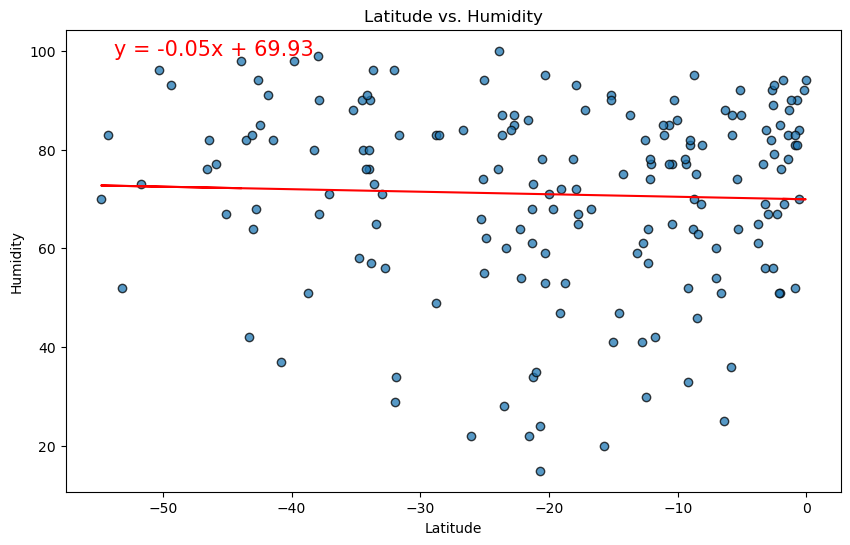

In [99]:
# Southern Hemisphere
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_humidity = southern_hemi_df["Humidity"]

plot_linear_regression(southern_hemi_lat, southern_hemi_humidity,
                       "Latitude vs. Humidity",
                       "Latitude", "Humidity")

**Discussion about the linear relationship:** There does not seem to be much of a relationship beteen Humidity and Latitute. In the plot for the Norther Hemisphere, there is much more of a slope when looking at the relationship between latitute and humidity - the higher the latitude, humidity slightly decreases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.017777139309262592


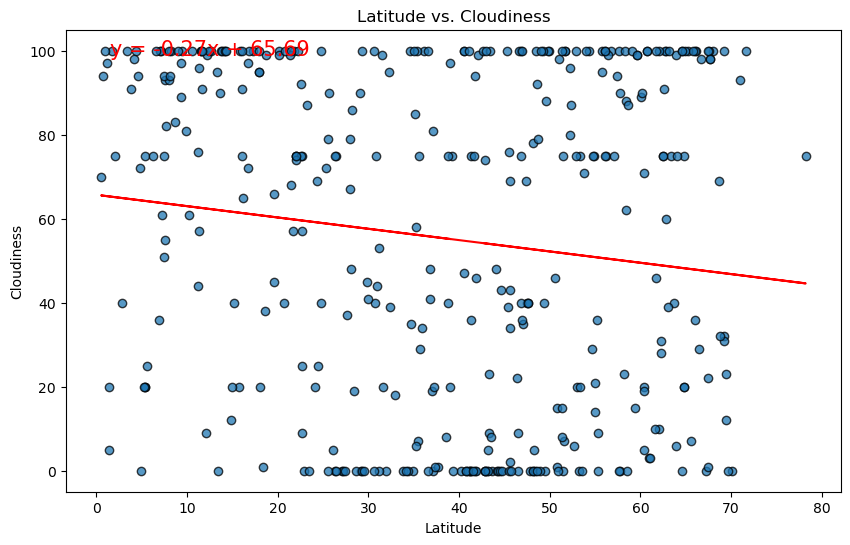

In [100]:
# Northern Hemisphere
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_cloudiness = northern_hemi_df["Cloudiness"]

plot_linear_regression(northern_hemi_lat, northern_hemi_cloudiness,
                       "Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness")

The r-value is: 0.012161400494563218


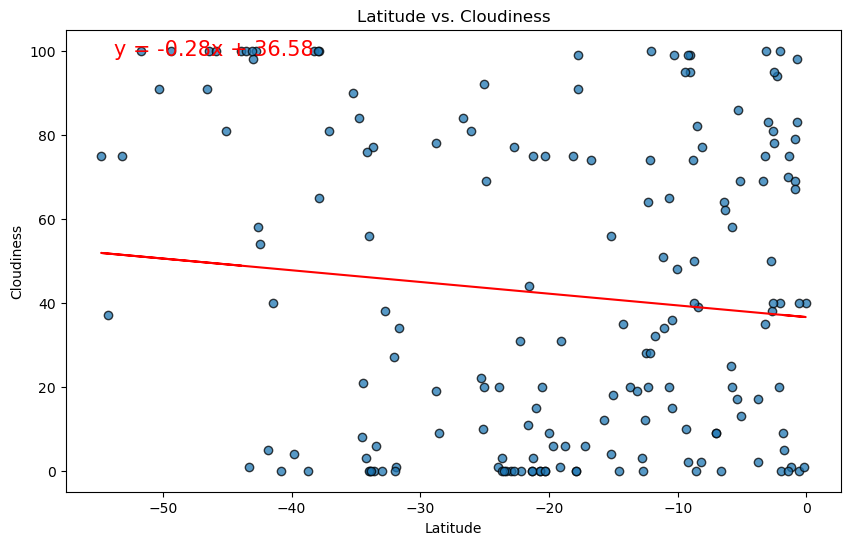

In [101]:
# Southern Hemisphere
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_cloudiness = southern_hemi_df["Cloudiness"]

plot_linear_regression(southern_hemi_lat, southern_hemi_cloudiness,
                       "Latitude vs. Cloudiness",
                       "Latitude", "Cloudiness")

**Discussion about the linear relationship:** Both the Northern and Southern Hemispheres show similar slopes in regards to Cloudiness vs. Latitude. This shows that the higher the latitude, the less cloudiness is observed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010734767628300335


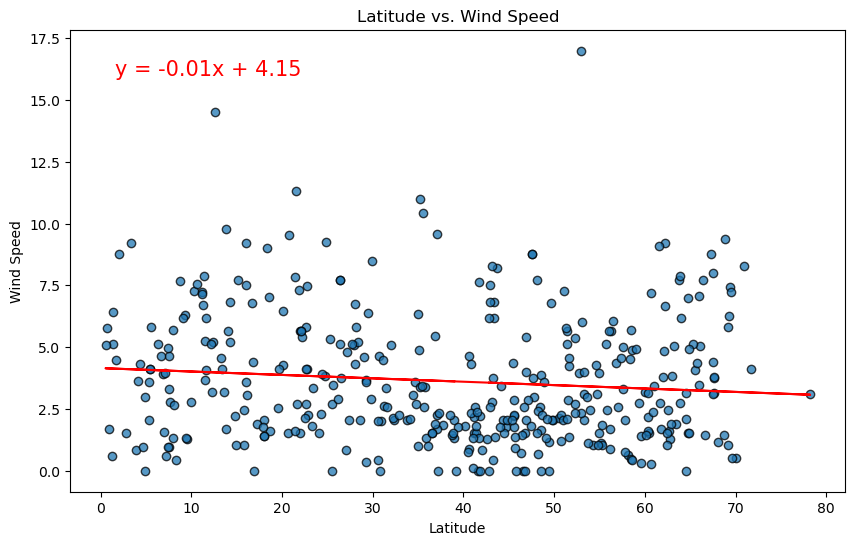

In [102]:
# Northern Hemisphere
northern_hemi_lat = northern_hemi_df["Lat"]
northern_hemi_wind = northern_hemi_df["Wind Speed"]

plot_linear_regression(northern_hemi_lat, northern_hemi_wind,
                       "Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed")

The r-value is: 0.023758488277616875


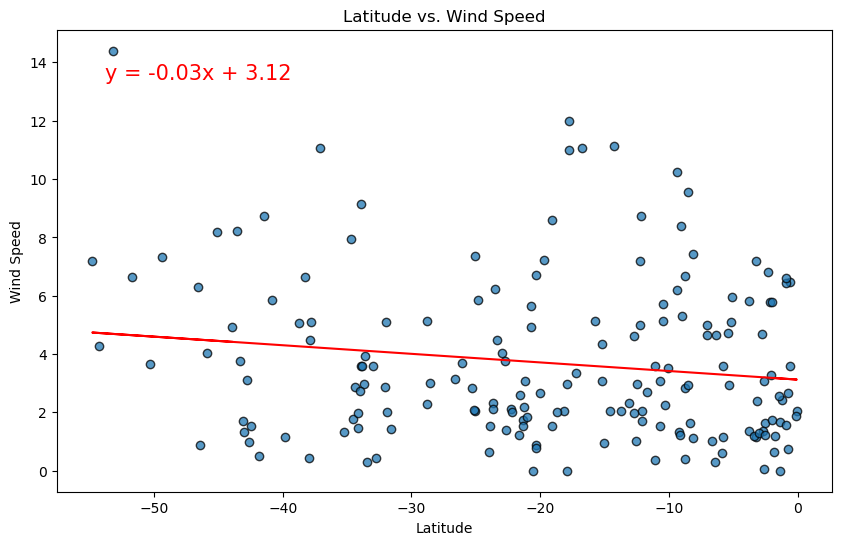

In [103]:
# Southern Hemisphere
southern_hemi_lat = southern_hemi_df["Lat"]
southern_hemi_wind = southern_hemi_df["Wind Speed"]

plot_linear_regression(southern_hemi_lat, southern_hemi_wind,
                       "Latitude vs. Wind Speed",
                       "Latitude", "Wind Speed")

**Discussion about the linear relationship:** There is more variation in wind speeds in the Southern Hemisphere than there is in the Northern Hemisphere. In the Northern Hemisphere, wind speeds are clustered around the lower portion of the graph regardless of latitude, while in the Southern Hemisphere there is a stronger relationship between windspeed and latitude showing that there is some correlation that the higher the latitude the wind speed is likely to be stronger.